In [1]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive', force_remount=True)

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [2]:
#imports
import pandas as pd

In [9]:
#file_path1 = '/content/drive/MyDrive/nyt_articles/nyt_clickbait_labeled_full.csv'
#file_path2 = '/content/drive/MyDrive/nyt_articles/nyt_clickbait_headline_lead.csv'
file_path1 = '/content/drive/MyDrive/nyt_articles/streamie_headline_test.csv'
file_path2 = '/content/drive/MyDrive/nyt_articles/streamie_lead_test.csv'
df =pd.read_csv(file_path1, low_memory=False)
df_lead = pd.read_csv(file_path2, low_memory=False)

/tmp/ipython-input-12-1354981473.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['pub_date'].dt.to_period('M')
/tmp/ipython-input-12-1354981473.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_lead['year_month'] = df_lead['pub_date'].dt.to_period('M')


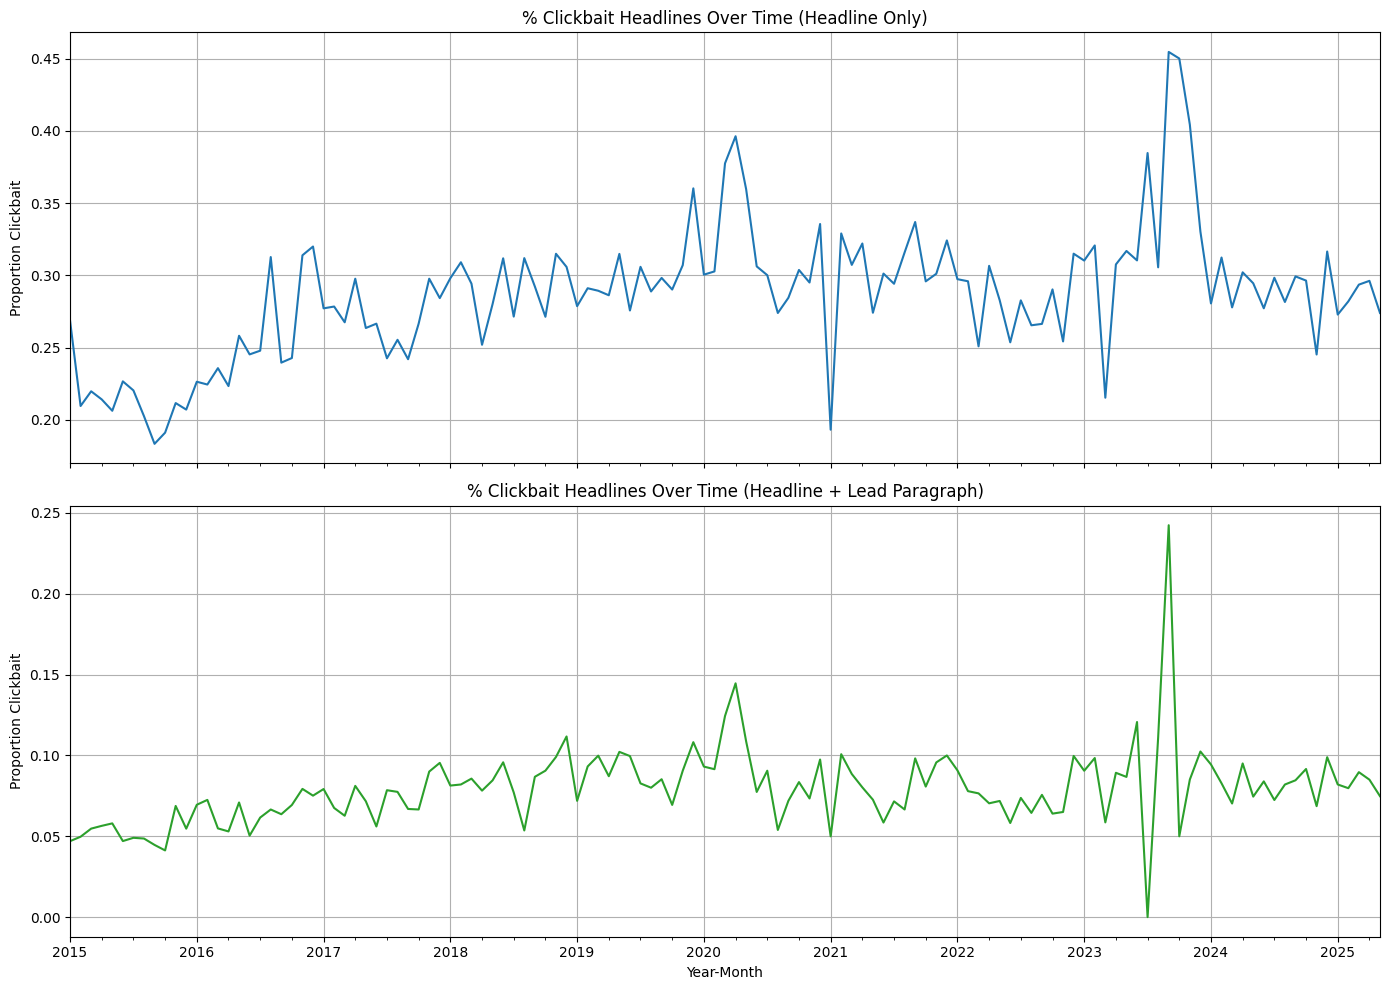

In [12]:
import matplotlib.pyplot as plt
# Convert to datetime and extract year-month
df['pub_date'] = pd.to_datetime(df['pub_date'], errors='coerce')
df_lead['pub_date'] = pd.to_datetime(df_lead['pub_date'], errors='coerce')

df['year_month'] = df['pub_date'].dt.to_period('M')
df_lead['year_month'] = df_lead['pub_date'].dt.to_period('M')

# Compute monthly clickbait proportions
monthly_clickbait_headline = (
    df.groupby('year_month')['clickbait_label']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)

monthly_clickbait_lead = (
    df_lead.groupby('year_month')['clickbait_label']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)

# Plot
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

monthly_clickbait_headline['LABEL_1'].plot(
    ax=axs[0], title="% Clickbait Headlines Over Time (Headline Only)", color='tab:blue'
)
axs[0].set_ylabel("Proportion Clickbait")
axs[0].grid(True)

monthly_clickbait_lead['LABEL_1'].plot(
    ax=axs[1], title="% Clickbait Headlines Over Time (Headline + Lead Paragraph)", color='tab:green'
)
axs[1].set_ylabel("Proportion Clickbait")
axs[1].grid(True)

plt.xlabel("Year-Month")
plt.tight_layout()
plt.show()

/tmp/ipython-input-34-2222924547.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  d['year_month'] = d['pub_date'].dt.to_period('M')
/tmp/ipython-input-34-2222924547.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  d['year_month'] = d['pub_date'].dt.to_period('M')


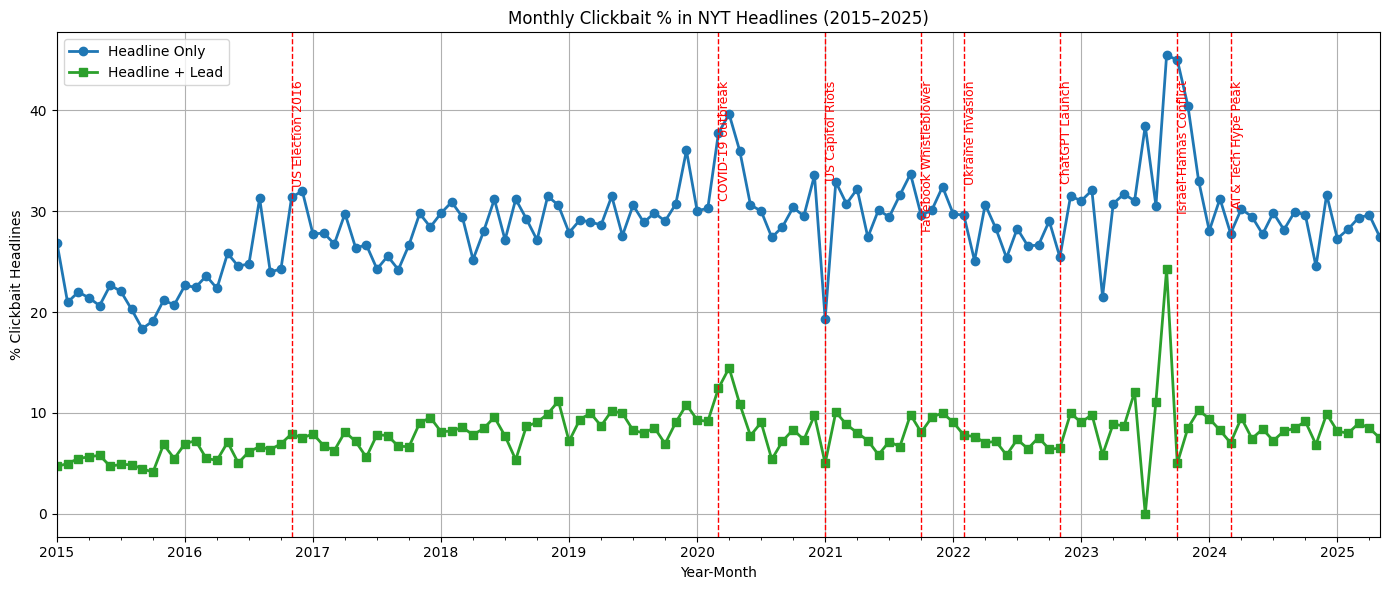

In [34]:
df = pd.read_csv(file_path1, low_memory=False)
df_lead = pd.read_csv(file_path2, low_memory=False)

# Parse pub_date and extract year_month
for d in [df, df_lead]:
    d['pub_date'] = pd.to_datetime(d['pub_date'], errors='coerce')
    d['year_month'] = d['pub_date'].dt.to_period('M')

# Compute monthly % clickbait
def compute_clickbait_percentage(dataframe):
    monthly_total = dataframe.groupby('year_month').size()
    monthly_clickbait = dataframe[dataframe['clickbait_label'] == 'LABEL_1'].groupby('year_month').size()
    return (monthly_clickbait / monthly_total * 100).fillna(0)

monthly_pct_df = compute_clickbait_percentage(df)
monthly_pct_df_lead = compute_clickbait_percentage(df_lead)

# Plot
plt.figure(figsize=(14, 6))
monthly_pct_df.plot(label='Headline Only', color='tab:blue', linewidth=2, marker='o')
monthly_pct_df_lead.plot(label='Headline + Lead', color='tab:green', linewidth=2, marker='s')

plt.title("Monthly Clickbait % in NYT Headlines (2015–2025)")
plt.xlabel("Year-Month")
plt.ylabel("% Clickbait Headlines")
plt.grid(True)
plt.legend()

# Annotate major events
events = {
    '2016-11': 'US Election 2016',
    '2020-03': 'COVID-19 outbreak',
    '2021-01': 'US Capitol Riots',
    '2021-10': 'Facebook Whistleblower',
    '2022-02': 'Ukraine Invasion',
    '2022-11': 'ChatGPT Launch',
    '2023-10': 'Israel-Hamas Conflict',
    '2024-03': 'AI & Tech Hype Peak',
}

for date, label in events.items():
    x = pd.Period(date)
    plt.axvline(x=x, color='red', linestyle='--', linewidth=1)
    plt.text(x, plt.ylim()[1]*0.9, label, rotation=90, color='red', fontsize=9, verticalalignment='top')

plt.tight_layout()
plt.show()

<ipython-input-3-d6f5f988a92f>:58: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['pub_date'].dt.to_period('M')
<ipython-input-3-d6f5f988a92f>:59: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_lead['year_month'] = df_lead['pub_date'].dt.to_period('M')


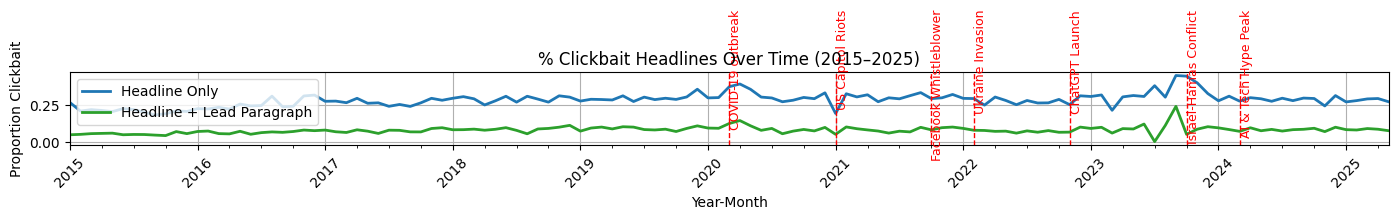

In [3]:
'''
df = pd.read_csv(file_path1, low_memory=False)
df_lead = pd.read_csv(file_path2, low_memory=False)
# Ensure datetime formatting
df['pub_date'] = pd.to_datetime(df['pub_date'], errors='coerce')
df_lead['pub_date'] = pd.to_datetime(df_lead['pub_date'], errors='coerce')
df['year_month'] = df['pub_date'].dt.to_period('M')
df_lead['year_month'] = df_lead['pub_date'].dt.to_period('M')

# Monthly clickbait proportions
monthly_clickbait_headline = df.groupby('year_month')['clickbait_label'].value_counts(normalize=True).unstack().fillna(0)
monthly_clickbait_lead = df_lead.groupby('year_month')['clickbait_label'].value_counts(normalize=True).unstack().fillna(0)

# Create a single line plot
plt.figure(figsize=(14, 6))
monthly_clickbait_headline['LABEL_1'].plot(label='Headline Only', color='tab:blue', linewidth=2)
monthly_clickbait_lead['LABEL_1'].plot(label='Headline + Lead Paragraph', color='tab:green', linewidth=2)

plt.title("% Clickbait Headlines Over Time")
plt.ylabel("Proportion Clickbait")
plt.xlabel("Year-Month")
plt.grid(True)
plt.legend()

# Annotate key events (same as previous setup)

event_annotations = {
    '2020-03': 'COVID-19 outbreak',
    '2021-01': 'US Capitol Riots',
    '2021-10': 'Facebook Whistleblower',
    '2022-02': 'Ukraine Invasion',
    '2022-11': 'ChatGPT Launch',
    '2023-10': 'Israel-Hamas Conflict',
    '2024-03': 'AI & Tech Hype Peak',
}


for month, label in event_annotations.items():
    plt.axvline(x=pd.Period(month), color='red', linestyle='--', linewidth=1)
    plt.text(pd.Period(month), 0.95, label, rotation=90, color='red', fontsize=9, verticalalignment='top')

plt.tight_layout()
plt.show()
'''

import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
file_path1 = '/content/drive/MyDrive/nyt_articles/streamie_headline_test.csv'
file_path2 = '/content/drive/MyDrive/nyt_articles/streamie_lead_test.csv'
df = pd.read_csv(file_path1, low_memory=False)
df_lead = pd.read_csv(file_path2, low_memory=False)

# Ensure datetime formatting
df['pub_date'] = pd.to_datetime(df['pub_date'], errors='coerce')
df_lead['pub_date'] = pd.to_datetime(df_lead['pub_date'], errors='coerce')
df['year_month'] = df['pub_date'].dt.to_period('M')
df_lead['year_month'] = df_lead['pub_date'].dt.to_period('M')

# Compute monthly proportions
monthly_clickbait_headline = df.groupby('year_month')['clickbait_label'].value_counts(normalize=True).unstack().fillna(0)
monthly_clickbait_lead = df_lead.groupby('year_month')['clickbait_label'].value_counts(normalize=True).unstack().fillna(0)

# Trim to 2015–2025 but make compact by rotating x-ticks, reducing labels
plt.figure(figsize=(14, 5))  # Less height for compactness

monthly_clickbait_headline['LABEL_1'].plot(label='Headline Only', color='tab:blue', linewidth=2)
monthly_clickbait_lead['LABEL_1'].plot(label='Headline + Lead Paragraph', color='tab:green', linewidth=2)

plt.title("% Clickbait Headlines Over Time (2015–2025)")
plt.ylabel("Proportion Clickbait")
plt.xlabel("Year-Month")
plt.grid(True)
plt.legend()

# Annotate major world and digital culture events
event_annotations = {
    '2020-03': 'COVID-19 outbreak',
    '2021-01': 'US Capitol Riots',
    '2021-10': 'Facebook Whistleblower',
    '2022-02': 'Ukraine Invasion',
    '2022-11': 'ChatGPT Launch',
    '2023-10': 'Israel-Hamas Conflict',
    '2024-03': 'AI & Tech Hype Peak',
}

for month, label in event_annotations.items():
    plt.axvline(x=pd.Period(month), color='red', linestyle='--', linewidth=1)
    plt.text(pd.Period(month), 0.91, label, rotation=90, color='red', fontsize=9, verticalalignment='top')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
# Example: Get clickbait rows from April 2023
sample_month = '2023-04'
df_filtered = df[(df['year_month'] == sample_month) & (df['clickbait_label'] == 'LABEL_1')]
df_filtered[['headline_main', 'lead_paragraph']].sample(5, random_state=1)

,headline_main,lead_paragraph
89267,Should All States Have Aid in Dying Laws?,To the Editor:
81969,How Much Watching Time Do You Have This Weekend?,"‘Barry’When to watch: Sunday at 10 p.m., on HBO."
83393,"Yellow Plus Blue? One Answer, So Many Meanings","“Green” is “the color of growing grass,” accor..."
83983,Religion Has Friends Among Judges in High Places,"Tylenol, the familiar brand name for acetamino..."
89044,The Problem With Everything-Bagel Liberalism,"In February, I visited Tahanan, a building tha..."


In [10]:
headline_counts = df['clickbait_label'].value_counts()
lead_counts = df_lead['clickbait_label'].value_counts()

# Proportions
headline_props = df['clickbait_label'].value_counts(normalize=True) * 100
lead_props = df_lead['clickbait_label'].value_counts(normalize=True) * 100

# Display
print("🔎 Headline-only counts and percentages:")
print(headline_counts)
print(headline_props.round(2))

print("\n🔎 Headline + Lead counts and percentages:")
print(lead_counts)
print(lead_props.round(2))

🔎 Headline-only counts and percentages:
clickbait_label
LABEL_0    79099
LABEL_1    30901
Name: count, dtype: int64
clickbait_label
LABEL_0    71.91
LABEL_1    28.09
Name: proportion, dtype: float64

🔎 Headline + Lead counts and percentages:
clickbait_label
LABEL_0    100733
LABEL_1      8551
Name: count, dtype: int64
clickbait_label
LABEL_0    92.18
LABEL_1     7.82
Name: proportion, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, ttest_ind
import os
from scipy.stats import ttest_rel

# Helper function to load and prepare both datasets
def load_datasets(file_path1, file_path2):
    df = pd.read_csv(file_path1, low_memory=False)
    df_lead = pd.read_csv(file_path2, low_memory=False)

    # Ensure datetime format
    df['pub_date'] = pd.to_datetime(df['pub_date'], errors='coerce')
    df['year'] = df['pub_date'].dt.year
    df_lead['pub_date'] = pd.to_datetime(df_lead['pub_date'], errors='coerce')
    df_lead['year'] = df_lead['pub_date'].dt.year

    return df, df_lead

# Basic statistics
def basic_stats(df):
    return {
        "total_rows": len(df),
        "clickbait_distribution": df['clickbait_label'].value_counts(normalize=True),
        "missing_by_column": df.isnull().sum().sort_values(ascending=False),
        "years_covered": df['year'].value_counts().sort_index(),
        "top_sections": df['section_name'].value_counts().head(10)
    }

# Section-wise clickbait distribution comparison
def section_clickbait_distribution(df, df_lead):
    df_counts = df.groupby(['section_name', 'clickbait_label']).size().unstack().fillna(0)
    df_lead_counts = df_lead.groupby(['section_name', 'clickbait_label']).size().unstack().fillna(0)
    combined = df_counts.join(df_lead_counts, lsuffix='_headline', rsuffix='_combined')
    return combined

# ChatGPT introduction effect (assume March 2023)
def chatgpt_effect(df):
    df['post_chatgpt'] = df['pub_date'] >= '2023-03-01'
    counts = df.groupby(['post_chatgpt', 'clickbait_label']).size().unstack().fillna(0)
    return counts

# Statistical test: Chi-square for section vs clickbait label
def chi_square_test(df):
    contingency = pd.crosstab(df['section_name'], df['clickbait_label'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    return {"chi2": chi2, "p_value": p, "dof": dof}

# Statistical test: T-test for score difference
def t_test_score_diff(df1, df2):
    df1_sorted = df1.sort_values(by=['_id']).reset_index(drop=True)
    df2_sorted = df2.sort_values(by=['_id']).reset_index(drop=True)

    common_ids = list(set(df1_sorted['_id']) & set(df2_sorted['_id']))  # Convert to list here

    df1_scores = df1_sorted[df1_sorted['_id'].isin(common_ids)].set_index('_id')['clickbait_score']
    df2_scores = df2_sorted[df2_sorted['_id'].isin(common_ids)].set_index('_id')['clickbait_score']

    score1 = df1_scores.loc[common_ids]
    score2 = df2_scores.loc[common_ids]

    stat, p = ttest_rel(score1, score2)
    return {"t_statistic": stat, "p_value": p}

# Export function for plotting or additional summary
def export_summary(df, filename):
    summary = df.describe(include='all')
    summary.to_csv(filename)

In [ ]:
# Set paths
path1 = "/content/drive/MyDrive/nyt_articles/nyt_clickbait_labeled_full.csv"
path2 = "/content/drive/MyDrive/nyt_articles/nyt_clickbait_labeled_lead.csv"

# Load data
df, df_lead = load_datasets(path1, path2)

# Run analyses
print("✅ Basic stats (headline only):", basic_stats(df))
print("✅ Basic stats (headline + lead):", basic_stats(df_lead))

# Section-level comparison
section_diff = section_clickbait_distribution(df, df_lead)
section_diff.to_csv("/content/drive/MyDrive/nyt_articles/section_clickbait_comparison.csv")
display(section_diff.head(10))

# ChatGPT impact
chatgpt_df = chatgpt_effect(df)
print("🤖 Clickbait before/after ChatGPT:\n", chatgpt_df)

# Chi-square test
chi_test = chi_square_test(df)
print("📊 Chi-square test for section vs clickbait:\n", chi_test)



✅ Basic stats (headline only): {'total_rows': 110000, 'clickbait_distribution': clickbait_label
NOT          0.855045
CLICKBAIT    0.144955
Name: proportion, dtype: float64, 'missing_by_column': subsection_name     64367
print_page          44560
print_section       44551
news_desk            3212
type_of_material     2794
snippet              1207
lead_paragraph        716
section_name          212
abstract              181
headline_main           6
web_url                 0
source                  0
multimedia              0
pub_date                0
document_type           0
headline                0
byline                  0
keywords                0
word_count              0
_id                     0
uri                     0
year                    0
clickbait_label         0
clickbait_score         0
dtype: int64, 'years_covered': year
2015    10000
2016    10000
2017    10000
2018    10000
2019    10000
2020    10000
2021    10000
2022    10000
2023    10000
2024    10000
2025 

clickbait_label,CLICKBAIT_headline,NOT_headline,CLICKBAIT_combined,NOT_combined
section_name,,,,
Admin,37.0,25.0,28.0,33.0
Arts,1145.0,7328.0,930.0,7507.0
At Home,31.0,63.0,10.0,84.0
Automobiles,2.0,60.0,4.0,57.0
Blogs,45.0,239.0,8.0,276.0
Books,785.0,2905.0,421.0,3232.0
Briefing,1071.0,1015.0,182.0,1896.0
Burst,6.0,3.0,4.0,5.0
Business Day,419.0,7160.0,300.0,7242.0


🤖 Clickbait before/after ChatGPT:
 clickbait_label  CLICKBAIT    NOT
post_chatgpt                     
False                11622  71314
True                  4323  22741
📊 Chi-square test for section vs clickbait:
 {'chi2': np.float64(14162.003608998093), 'p_value': np.float64(0.0), 'dof': 66}


In [ ]:
# Paired T-test on clickbait score differences
t_test_result = t_test_score_diff(df, df_lead)
print("🧪 T-test on score differences (headline vs lead):\n", t_test_result)


🧪 T-test on score differences (headline vs lead):
 {'t_statistic': np.float64(69.76420038822965), 'p_value': np.float64(0.0)}


### HEADLINE ONLY VS HEADLINE LEAD USING WEBIS ROBERTA

In [ ]:
df_headlineonly_stremie = pd.read_csv("/content/drive/MyDrive/nyt_articles/nyt_clickbait_headline_only_robertastremie.csv")
df_headline_lead_stremie =  pd.read_csv("/content/drive/MyDrive/nyt_articles/nyt_clickbait_headline_lead.csv")

/tmp/ipython-input-35-1624053470.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_headlineonly_stremie = pd.read_csv("/content/drive/MyDrive/nyt_articles/nyt_clickbait_headline_only_robertastremie.csv")
/tmp/ipython-input-35-1624053470.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_headline_lead_stremie =  pd.read_csv("/content/drive/MyDrive/nyt_articles/nyt_clickbait_headline_lead.csv")


In [ ]:
# df_headlineonly_stremie['clickbait_label'] = df_headlineonly_stremie['clickbait_label'].map({'LABEL_0': 'NOT', 'LABEL_1': 'CLICKBAIT'})

In [ ]:
df_headlineonly_stremie.shape

(110000, 24)

In [ ]:
df_headline_lead_stremie.shape

(109284, 25)

In [ ]:
# Count values
print(df_headlineonly_stremie['clickbait_label'].value_counts())

# # Print results
# print("Total counts based on clickbait_label for headline only approach:")
# print(label_counts)

clickbait_label
LABEL_0    74024
LABEL_1    35976
Name: count, dtype: int64


In [ ]:
# Count values
label_counts = df_headline_lead_stremie['clickbait_label'].value_counts(dropna=False)

# Print results
print("Total counts based on clickbait_label for headline only approach:")
print(label_counts)

Total counts based on clickbait_label for headline only approach:
clickbait_label
LABEL_0    97607
LABEL_1    11677
Name: count, dtype: int64


In [ ]:
print(df_headline_lead_stremie['clickbait_label'].value_counts(normalize=True)*100)

clickbait_label
LABEL_0    89.314996
LABEL_1    10.685004
Name: proportion, dtype: float64


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import pandas as pd
from tqdm import tqdm

# Load your data
df = pd.read_csv('/content/drive/MyDrive/nyt_articles/nyt-2015-2025.csv', low_memory=False)

# Filter rows with both headline and lead_paragraph
df = df[df['headline'].notnull() & df['lead_paragraph'].notnull()].copy()

# Extract headline text (robust to JSON-like dicts)
import ast
def extract_headline_main(h):
    try:
        return ast.literal_eval(h).get('main', None)
    except:
        return h if isinstance(h, str) else None

df['headline_main'] = df['headline'].apply(extract_headline_main)
df = df[df['headline_main'].notnull()]

# Combine fields
df['combined_text'] = df['headline_main']

# Load model
model_name = "Stremie/xlm-roberta-base-clickbait"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
clickbait_pipe = pipeline("text-classification", model=model, tokenizer=tokenizer, truncation=True, device=0)

# Initialize new columns
df['clickbait_label'] = pd.Series(dtype='object')
df['clickbait_score'] = pd.Series(dtype='float64')

# Batch prediction
batch_size = 32
results = []
texts = df['combined_text'].tolist()

for i in tqdm(range(0, len(texts), batch_size)):
    batch = texts[i:i+batch_size]
    preds = clickbait_pipe(batch)
    results.extend(preds)

# Assign results
df['clickbait_label'] = [r['label'] for r in results]
df['clickbait_score'] = [r['score'] for r in results]

# Save updated version
df.to_csv('/content/drive/MyDrive/nyt_articles/nyt_clickbait_headline_only_robertastremie.csv', index=False)
print("Done. Predictions saved with clickbait_label and score.")


In [16]:
import re
from collections import Counter
def detect_clickbait_types(headline):
    headline = str(headline).lower()
    tags = []

    if re.search(r'\byou\b|\byour\b', headline):
        tags.append("Second-Person")

    if headline.strip().endswith('?') or re.match(r'^(what|why|how|who|when|where)\b', headline):
        tags.append("Question")

    if re.match(r'^\d+[\).]|\btop\s*\d+', headline):
        tags.append("Listicle")

    if re.search(r'\b(incredible|unbelievable|shocking|amazing|jaw[-\s]?dropping|epic|worst|best)\b', headline):
        tags.append("Hyperbole")

    if re.search(r'\b(you won[’\']?t believe|this is why|what happened next|will surprise you|goes viral|must see)\b', headline):
        tags.append("Curiosity Gap")

    return tags if tags else ["Other"]

# Filter clickbait only
headline_clickbait = df[df['clickbait_label'] == 'LABEL_1'].copy()
lead_clickbait = df_lead[df_lead['clickbait_label'] == 'LABEL_1'].copy()

# Apply type detection
headline_clickbait['clickbait_type'] = headline_clickbait['headline_main'].apply(detect_clickbait_types)
lead_clickbait['clickbait_type'] = lead_clickbait['headline_main'].apply(detect_clickbait_types)

# Count tag frequency
from collections import Counter
headline_counts = Counter([t for sub in headline_clickbait['clickbait_type'] for t in sub])
lead_counts = Counter([t for sub in lead_clickbait['clickbait_type'] for t in sub])

# Display results
comparison = pd.DataFrame([headline_counts, lead_counts], index=['Headline Only', 'Headline + Lead']).T.fillna(0).astype(int)
comparison.sort_values('Headline Only', ascending=False)

,Headline Only,Headline + Lead
Other,18612,4858
Question,9611,2603
Second-Person,3707,1541
Hyperbole,588,257
Curiosity Gap,7,5
Listicle,6,4


In [18]:
from sklearn.feature_extraction.text import CountVectorizer

other_headlines = headline_clickbait[headline_clickbait['clickbait_type'].apply(lambda x: 'Other' in x)]['headline_main'].dropna()

vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english', max_features=30)
X = vectorizer.fit_transform(other_headlines)
top_terms = vectorizer.get_feature_names_out()

print("Top unigrams/bigrams in 'Other' clickbait headlines:")
print(top_terms)

Top unigrams/bigrams in 'Other' clickbait headlines:
['10' 'america' 'books' 'briefing' 'corrections' 'day' 'don' 'home' 'just'
 'know' 'life' 'like' 'love' 'new' 'new york' 'people' 'quiz' 'real'
 'review' 'things' 'time' 'today' 'trump' 'week' 'weekend' 'word' 'wordle'
 'wordle review' 'world' 'york']


In [19]:
from sklearn.feature_extraction.text import CountVectorizer

other_headlines = lead_clickbait[lead_clickbait['clickbait_type'].apply(lambda x: 'Other' in x)]['headline_main'].dropna()

vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english', max_features=30)
X = vectorizer.fit_transform(other_headlines)
top_terms = vectorizer.get_feature_names_out()

print("Top unigrams/bigrams in 'Other' clickbait headlines:")
print(top_terms)

Top unigrams/bigrams in 'Other' clickbait headlines:
['10' 'books' 'day' 'great' 'just' 'know' 'late' 'like' 'love' 'new'
 'new york' 'news' 'news quiz' 'night' 'quiz' 'recipes' 'recommend'
 'recommend week' 'review' 'stories' 'stream' 'things' 'times' 'trump'
 'week' 'weekend' 'word' 'word quiz' 'year' 'york']


In [22]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from collections import Counter

# Load file
df = pd.read_csv('/content/drive/MyDrive/nyt_articles/streamie_headline_test.csv', low_memory=False)

# Define clickbait tagging rules
def detect_clickbait_types(headline):
    headline = str(headline).lower()
    tags = []
    if re.search(r'\byou\b|\byour\b', headline): tags.append("Second-Person")
    if headline.strip().endswith('?') or re.match(r'^(what|why|how|who|when|where)\b', headline): tags.append("Question")
    if re.match(r'^\d+[\).]|\btop\s*\d+', headline): tags.append("Listicle")
    if re.search(r'\b(incredible|unbelievable|shocking|amazing|jaw[-\s]?dropping|epic|worst|best)\b', headline): tags.append("Hyperbole")
    if re.search(r'\b(you won[’\']?t believe|this is why|what happened next|will surprise you|goes viral|must see)\b', headline): tags.append("Curiosity Gap")
    return tags if tags else ["Other"]

# Filter LABEL_1 + Other
df = df[(df['clickbait_label'] == 'LABEL_1') & df['headline_main'].notna()]
df['clickbait_type'] = df['headline_main'].apply(detect_clickbait_types)
df_other = df[df['clickbait_type'].apply(lambda x: 'Other' in x)].copy()

# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df_other['headline_main'])

# KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df_other['cluster'] = kmeans.fit_predict(X)

# Extract top terms per cluster
terms = vectorizer.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

for i in range(2):
    print(f"\n🔹 Cluster {i} Top Terms:")
    print([terms[ind] for ind in order_centroids[i, :10]])


🔹 Cluster 0 Top Terms:
['new', 'york', 'books', 'week', 'recommend', 'times', 'noteworthy', 'city', '10', 'year']

🔹 Cluster 1 Top Terms:
['trump', 'review', 'day', 'corrections', 'word', 'quiz', 'love', 'things', 'world', 'life']


In [23]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import pandas as pd
import re

# Load dataset
file_path = '/content/drive/MyDrive/nyt_articles/streamie_headline_test.csv'
df = pd.read_csv(file_path, low_memory=False)

# Detect clickbait types
def detect_clickbait_types(headline):
    headline = str(headline).lower()
    tags = []
    if re.search(r'\byou\b|\byour\b', headline): tags.append("Second-Person")
    if headline.strip().endswith('?') or re.match(r'^(what|why|how|who|when|where)\b', headline): tags.append("Question")
    if re.match(r'^\d+[\).]|\btop\s*\d+', headline): tags.append("Listicle")
    if re.search(r'\b(incredible|unbelievable|shocking|amazing|jaw[-\s]?dropping|epic|worst|best)\b', headline): tags.append("Hyperbole")
    if re.search(r'\b(you won[’\']?t believe|this is why|what happened next|will surprise you|goes viral|must see)\b', headline): tags.append("Curiosity Gap")
    return tags if tags else ["Other"]

df = df[(df['clickbait_label'] == 'LABEL_1') & df['headline_main'].notna()]
df['clickbait_type'] = df['headline_main'].apply(detect_clickbait_types)
df_other = df[df['clickbait_type'].apply(lambda x: 'Other' in x)].copy()

# Embed with SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(df_other['headline_main'].tolist(), show_progress_bar=True)

# KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df_other['semantic_cluster'] = kmeans.fit_predict(embeddings)

# Sample from each cluster
cluster_samples = df_other.groupby('semantic_cluster')['headline_main'].apply(lambda x: x.sample(5, random_state=1)).reset_index()

# Print sample headlines per cluster
for i in range(5):
    print(f"\n🔹 Cluster {i} Example Headlines:")
    for headline in cluster_samples[cluster_samples['semantic_cluster'] == i]['headline_main']:
        print(" -", headline)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/582 [00:00<?, ?it/s]


🔹 Cluster 0 Example Headlines:
 - Inside the Mystery of a Country Moonshine Bunker
 - Spring Is Here!
 - This Is the Cake We Baked
 - Behind the Scenes at This Season’s Most-Talked-About New Ballet
 - 5 Things to Do This Weekend

🔹 Cluster 1 Example Headlines:
 - Poem: American Sonnet 18
 - From South Korea, Clothes for the Man in Love With Himself
 - A Handy Measure
 - War, Remembrance and Tiny Game Birds
 - It’s OK to Feel OK Right Now

🔹 Cluster 2 Example Headlines:
 - France’s Big Decision
 - N.Y.C. Special Election: 7 Factors That Will Help Decide the Public Advocate Race
 - The Real Opioid Emergency
 - Four Experts on Tech Hiring Talk About Where the Jobs Are
 - The Threat of Nuclear War

🔹 Cluster 3 Example Headlines:
 - Word + Quiz: factious
 - 10 Recipes Readers Love
 - Poets to Discover
 - Stream These 11 Titles Before They Leave Netflix This Month
 - Today’s Wordle Review

🔹 Cluster 4 Example Headlines:
 - Corrections: Aug. 10, 2021
 - Corrections: July 16, 2019
 - Correcti

In [24]:
df_lead = df_lead[(df_lead['clickbait_label'] == 'LABEL_1') & df_lead['headline_main'].notna()]
df_lead['clickbait_type'] = df_lead['headline_main'].apply(detect_clickbait_types)
df_lead_other = df_lead[df_lead['clickbait_type'].apply(lambda x: 'Other' in x)].copy()

# Load sentence transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings_lead = model.encode(df_lead_other['headline_main'].tolist(), show_progress_bar=True)

# KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df_lead_other['semantic_cluster'] = kmeans.fit_predict(embeddings_lead)

# Sample from each cluster
cluster_samples_lead = df_lead_other.groupby('semantic_cluster')['headline_main'].apply(lambda x: x.sample(5, random_state=1)).reset_index()

# Print clusters
for i in range(5):
    print(f"\n🔹 Cluster {i} (Headline + Lead Model) Example Headlines:")
    for headline in cluster_samples_lead[cluster_samples_lead['semantic_cluster'] == i]['headline_main']:
        print(" -", headline)

Batches:   0%|          | 0/152 [00:00<?, ?it/s]


🔹 Cluster 0 (Headline + Lead Model) Example Headlines:
 - Searching for Love and Money in ‘My Brilliant Friend’
 - At 17, She’s Already Conquered Some of the World’s Big Swims
 - Tapping a Troubled Neighborhood’s Inner Strength
 - The Patient Was Like My Dad in Two Telling Ways: Age and Sex
 - I Thought I Disliked These Authors. I Was Happy to Be Wrong.

🔹 Cluster 1 (Headline + Lead Model) Example Headlines:
 - For Casual Indian Restaurants, It’s Party Time
 - Chicken + Peaches = Perfection
 - The Drinks Are on Me!
 - Four Dinners and a Breakfast
 - 18 Cookbooks for Comfort

🔹 Cluster 2 (Headline + Lead Model) Example Headlines:
 - The ‘Whimpering’ Terrorist Only Trump Seems to Have Heard
 - The New York Times News Quiz, May 13, 2022
 - The Truth About Shark Attacks
 - International News Quiz: North Korea, Turkey, France and More
 - 18 Questions With Kamala Harris

🔹 Cluster 3 (Headline + Lead Model) Example Headlines:
 - Pickens, West Virginia, 8:40 A.M.
 - Shopping for Settees
 - Wo

In [25]:
df = pd.read_csv(file_path1, low_memory=False)
df_lead = pd.read_csv(file_path2, low_memory=False)

# Filter clickbait rows
df_cb = df[df['clickbait_label'] == 'LABEL_1'].copy()
df_lead_cb = df_lead[df_lead['clickbait_label'] == 'LABEL_1'].copy()

# Define event keywords
event_keywords = {
    'COVID-19 outbreak': ['covid', 'coronavirus', 'pandemic', 'lockdown', 'vaccine'],
    'US Capitol Riots': ['capitol', 'trump', 'riot', 'insurrection', 'january 6'],
    'Ukraine Invasion': ['ukraine', 'russia', 'invasion', 'zelensky', 'war'],
    'ChatGPT Launch': ['chatgpt', 'openai', 'ai chatbot', 'language model'],
    'Israel-Hamas Conflict': ['israel', 'hamas', 'gaza', 'palestine', 'war'],
}

# Check for keyword mentions in headlines
event_counts = []
for event, keywords in event_keywords.items():
    pattern = '|'.join(keywords)

    count_df = df_cb['headline_main'].str.lower().str.contains(pattern, na=False).sum()
    count_lead = df_lead_cb['headline_main'].str.lower().str.contains(pattern, na=False).sum()

    event_counts.append({
        'Event': event,
        'Clickbait (Headline Only)': count_df,
        'Clickbait (Headline + Lead)': count_lead
    })

# Create results table
event_counts_df = pd.DataFrame(event_counts)
print(event_counts_df)

                   Event  Clickbait (Headline Only)  \
0      COVID-19 outbreak                        564   
1       US Capitol Riots                       1002   
2       Ukraine Invasion                        745   
3         ChatGPT Launch                          8   
4  Israel-Hamas Conflict                        635   

   Clickbait (Headline + Lead)  
0                          122  
1                          145  
2                          137  
3                            1  
4                          123  


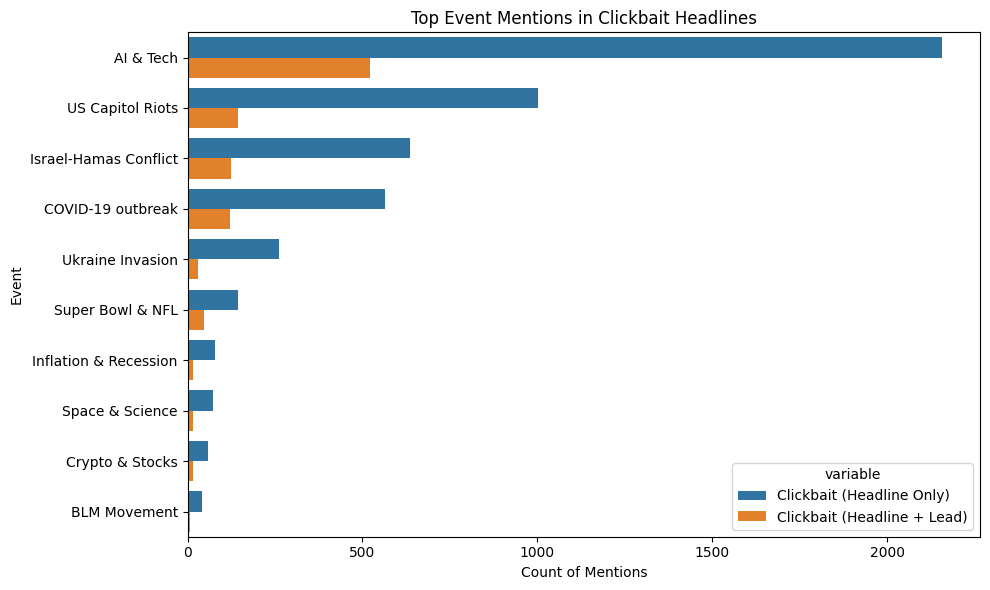

                Event  Clickbait (Headline Only)  Clickbait (Headline + Lead)
            AI & Tech                       2158                          521
     US Capitol Riots                       1002                          145
Israel-Hamas Conflict                        635                          123
    COVID-19 outbreak                        564                          122
     Ukraine Invasion                        262                           29
     Super Bowl & NFL                        143                           48
Inflation & Recession                         79                           17
      Space & Science                         74                           16
      Crypto & Stocks                         58                           15
         BLM Movement                         42                            7
       MeToo Movement                         35                            7
             Olympics                         24                

In [27]:
df = pd.read_csv(file_path1, low_memory=False)
df_lead = pd.read_csv(file_path2, low_memory=False)

# === Step 2: Filter clickbait rows only ===
df = df[(df['clickbait_label'] == 'LABEL_1') & df['headline_main'].notna()].copy()
df_lead = df_lead[(df_lead['clickbait_label'] == 'LABEL_1') & df_lead['headline_main'].notna()].copy()

# === Step 3: Define global event and trend keywords ===
event_keywords = {
    "COVID-19 outbreak": ["covid", "pandemic", "coronavirus", "lockdown", 'vaccine'],
    "US Capitol Riots": ["january 6", "insurrection", "stormed capitol", 'january 6','capitol', 'trump', 'riot'],
    "ChatGPT Launch": ["chatgpt", "openai", "ai chatbot"],
    "Israel-Hamas Conflict": ["israel", "hamas", "gaza", "palestine", "idf",'war'],
    'Ukraine Invasion': ['ukraine', 'russia', 'invasion', 'zelenskyy',"putin"],

    "Super Bowl & NFL": ["super bowl", "nfl", "tom brady", "chiefs", "patriots"],
    "Olympics": ["olympics", "tokyo 2020", "rio 2016", "simone biles", "gold medal"],
    "NBA": ["nba", "lebron", "warriors", "finals", "curry"],

    "Inflation & Recession": ["inflation", "recession", "job losses", "layoffs", "stimulus"],
    "Crypto & Stocks": ["bitcoin", "crypto", "nft", "ethereum", "gamestop", "stock market", "nasdaq", "dow jones"],

    "AI & Tech": ["artificial intelligence", "ai", "machine learning", "deep learning", "openai",'chatgpt', 'ai chatbot', 'language model'],
    "Space & Science": ["nasa", "spacex", "mars", "elon musk", "rocket launch"],

    "BLM Movement": ["black lives matter", "blm", "george floyd", "racism", "protests"],
    "MeToo Movement": ["metoo", "me too", "harvey weinstein", "sexual assault"],
}

# === Step 4: Function to count event mentions ===
def count_event_mentions(df, column='headline_main'):
    counts = {}
    for event, keywords in event_keywords.items():
        pattern = "|".join([re.escape(word) for word in keywords])
        matches = df[df[column].str.contains(pattern, case=False, na=False)]
        counts[event] = len(matches)
    return counts

# === Step 5: Run event detection on both datasets ===
headline_counts = count_event_mentions(df)
lead_counts = count_event_mentions(df_lead)

# === Step 6: Create and display final results table ===
result_df = pd.DataFrame({
    "Event": list(event_keywords.keys()),
    "Clickbait (Headline Only)": [headline_counts[e] for e in event_keywords],
    "Clickbait (Headline + Lead)": [lead_counts[e] for e in event_keywords],
})

# Sort by headline-only count
result_df = result_df.sort_values(by="Clickbait (Headline Only)", ascending=False).reset_index(drop=True)

# Show table
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: visualize top events
plt.figure(figsize=(10, 6))
sns.barplot(data=result_df.head(10).melt(id_vars='Event'), x='value', y='Event', hue='variable')
plt.title("Top Event Mentions in Clickbait Headlines")
plt.xlabel("Count of Mentions")
plt.ylabel("Event")
plt.tight_layout()
plt.show()

# Also print result
print(result_df.to_string(index=False))